In [59]:
import random
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series
from matplotlib import *

from scipy import integrate
from numpy import sqrt, sin, cos, pi

In [2]:
def cor_test(buf):
    
    bufer = buf.copy()
    key = []
    for i in range(0, len(bufer)):
        key.append(bin(i))
    key = ''.join(key)
    key = key.replace('b', '')
    #print(key)  
    sum_key = 0
    sum_key_1 = 0
    key_1= str(key[-1]+key[:(len(key)-1)])
    
    for i in range(len(key)):
        sum_key+=int(key[i])
    for i in range(len(key_1)):
        sum_key_1+=int(key_1[i])
    
    top_sum_1=0
    low_sum_1=0
    low_sum_2=0
    
    for i in range(len(key)):
        top_sum_1+=(int(key[i])*int(key_1[i]))
    for i in range(len(key)):
        low_sum_1+=(int(key[i])**2)
    for i in range(len(key)):
        low_sum_2+=(int(key_1[i])**2) 
        
    R= ((len(key)*top_sum_1) - (sum_key*sum_key_1))/pow(((len(key)*low_sum_1 - sum_key**2)*((len(key)*low_sum_2) - sum_key_1**2)), 0.5)
    R_mod =(1/(len(key)-1))+(2/(len(key)-2))*pow(((len(key))*((len(key))-3))/(len(key)+1) , 0.5)
    print(f'Коэффициент автокорреляции при k=1:{R}')
    print(f'Модульное значение (8):{R_mod}') 

def exp_interval_dov(model, teor):

    bufer = model.copy()
    
    middle = sum(model)/len(model)
    alpha = 0.05
    M_teor = sum(teor)/len(teor)
    d_pr = M_teor - middle 
    d_cr = np.sqrt(np.var(bufer)/(len(bufer) * alpha))
    
    print(f"Практическое значение интервала {d_pr}")
    print(f"Критическое значение значение интервала {d_cr}")
    
    bufer_normal = np.random.normal(loc=0.0, scale=1.0, size=len(bufer))
    minik = min(bufer_normal)
    #print(minik)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i] + np.abs(minik))
                           
    maxik = max(bufer_normal)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i])/maxik
    
    middle_normal = sum(bufer_normal)/len(bufer_normal)
    
    x_2 = 3.84
    d_pr_normal = M_teor - middle_normal 
    d_cr_normal = np.sqrt(x_2 * np.var(bufer_normal)/(len(bufer_normal)))
    
    print(f"Практическое значение интервала для нормальных чисел {d_pr_normal}")
    print(f"Критическое значение значение интервала для нормальных чисел {d_cr_normal}")

def fric_test_exp(model, teor):#Частотный тест
    
    bufer = model.copy()
    
    drob = 0.1
    #P_teor = len(buf)/10
    x_1 = x_2 = x_3 = x_4 = x_5 = x_6 = x_7 = x_8 = x_9 = x_10 = 0
    x = []
    for i in range(0, len(bufer)):
        if bufer[i] <= drob:
            x_1 += 1
        elif (bufer[i] > drob and bufer[i] <= (drob * 2)):
            x_2 += 1
        elif (bufer[i] > drob * 2 and bufer[i] <= (drob * 3)):
            x_3 += 1
        elif (bufer[i] > drob * 3 and bufer[i] <= (drob * 4)):
            x_4 += 1
        elif (bufer[i] > drob * 4 and bufer[i] <= (drob * 5)):
            x_5 += 1
        elif (bufer[i] > drob * 5 and bufer[i] <= (drob * 6)):
            x_6 += 1
        elif (bufer[i] > drob * 6 and bufer[i] <= (drob * 7)):
            x_7 += 1
        elif (bufer[i] > drob * 7 and bufer[i] <= (drob * 8)):
            x_8 += 1
        elif (bufer[i] > drob * 8 and bufer[i] <= (drob * 9)):
            x_9 += 1
        elif (bufer[i] > drob * 9 and bufer[i] <= (drob * 10)):
            x_10 += 1
    x.append(x_1)
    x.append(x_2)
    x.append(x_3)
    x.append(x_4)
    x.append(x_5)
    x.append(x_6)
    x.append(x_7)
    x.append(x_8)
    x.append(x_9)
    x.append(x_10)
     
    P_teor =0.1    
    x_1 = x_1/len(bufer)
    x_2 = x_2/len(bufer)
    x_3 = x_3/len(bufer)
    x_4 = x_4/len(bufer)
    x_5 = x_5/len(bufer)
    x_6 = x_6/len(bufer)
    x_7 = x_7/len(bufer)
    x_8 = x_8/len(bufer)
    x_9 = x_9/len(bufer)
    x_10 = x_10/len(bufer)
        
    X_2 = (((x_1 - P_teor) ** 2)/P_teor) + (((x_2 - P_teor) ** 2)/P_teor) + (((x_3 - P_teor) ** 2)/P_teor) + (((x_4 - P_teor) ** 2)/P_teor) + (((x_5 - P_teor) ** 2)/P_teor) + (((x_6 - P_teor) ** 2)/P_teor) + (((x_7 - P_teor) ** 2)/P_teor) + (((x_8 - P_teor) ** 2)/P_teor) + (((x_9 - P_teor) ** 2)/P_teor)  + (((x_10 - P_teor) ** 2)/P_teor)
        
    return X_2
    
    #drob = np.exp(-1)
    #P_teor = len(buf)/10
    #x = []
    #x_teor = []
    #for i in range(0, 10):
    #    fuck = 0
    #    for j in range(0 + i*500, 500 + i*500):
    #        fuck += bufer[j]
    #    x.append(fuck/500)
    #    fuck = 0
    #print(x)
    #for i in range(0, 10):
    #    x_teor.append((np.exp(0 - i + 1)- np.exp(0 - i))/2)
    #
    #X_2 = 0
    #
    #for i in range(0, 10):
    #    X_2 += ((x_teor[i] - x[i])**2)/2
    
    #return X_2

#buf_paretto = np.random.pareto(a=1, size=(1, 10000))[0]
#buf_exp = exp_raspr(10000)
#buf_weib = np.random.weibull(1, 1000) 



Экспоненциальный закон распределения

In [76]:
def exp_raspr_teor(N):
    L = 0.002
    y = [np.exp(-i*L) for i in range(0, N)]
    return y
def model_raspr(N):
    L = 0.002 
    y = []
    for i in range(0, N):
        y.append(-1/L*np.log(np.random.random(1)[0]))
    return y

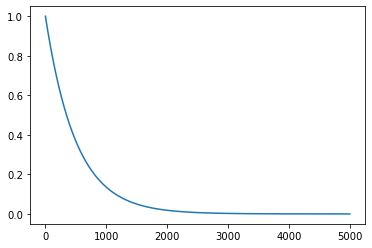

In [73]:
plt.plot(exp_raspr_teor(5000))
plt.show()

In [118]:
buf_exp = model_raspr(5000)
buf_exp = buf_exp/max(buf_exp)
print(f'Значение Хи квадрат из частотного теста:{fric_test_exp(buf_exp, exp_raspr_teor(5000))}')
cor_test(buf_exp)
exp_interval_dov(buf_exp, exp_raspr_teor(5000))

#print(buf_weib)
#print(exp_raspr(100))

Значение Хи квадрат из частотного теста:3.3568512000000004
Коэффициент автокорреляции при k=1:-0.08391894678384228
Модульное значение (8):0.008060707915180673
Практическое значение интервала -0.007557756442635261
Критическое значение значение интервала 0.006803373031387276
Практическое значение интервала для нормальных чисел -0.4075807252001695
Критическое значение значение интервала для нормальных чисел 0.003745074997541361


count    5000.000000
mean        0.115860
std         0.115418
min         0.000016
25%         0.034510
50%         0.080367
75%         0.158975
max         1.000000
dtype: float64


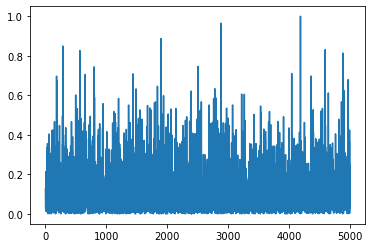

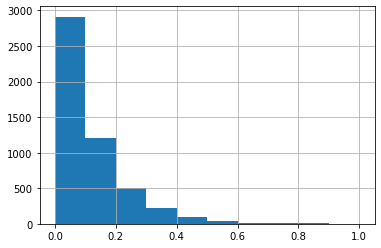

In [101]:

series = Series(buf_exp)
print(series.describe())
series.plot()
pyplot.show()

# histogram plot
series.hist()
pyplot.show()

Распределение Парето 

In [159]:
def cor_test(buf):
    
    bufer = buf.copy()
    key = []
    for i in range(0, len(bufer)):
        key.append(bin(i))
    key = ''.join(key)
    key = key.replace('b', '')
    #print(key)  
    sum_key = 0
    sum_key_1 = 0
    key_1= str(key[-1]+key[:(len(key)-1)])
    
    for i in range(len(key)):
        sum_key+=int(key[i])
    for i in range(len(key_1)):
        sum_key_1+=int(key_1[i])
    
    top_sum_1=0
    low_sum_1=0
    low_sum_2=0
    
    for i in range(len(key)):
        top_sum_1+=(int(key[i])*int(key_1[i]))
    for i in range(len(key)):
        low_sum_1+=(int(key[i])**2)
    for i in range(len(key)):
        low_sum_2+=(int(key_1[i])**2) 
        
    R= ((len(key)*top_sum_1) - (sum_key*sum_key_1))/pow(((len(key)*low_sum_1 - sum_key**2)*((len(key)*low_sum_2) - sum_key_1**2)), 0.5)
    R_mod =(1/(len(key)-1))+(2/(len(key)-2))*pow(((len(key))*((len(key))-3))/(len(key)+1) , 0.5)
    print(f'Коэффициент автокорреляции при k=1:{R}')
    print(f'Модульное значение (8):{R_mod}') 

def par_interval_dov(model, teor):

    bufer = model.copy()
    m = max(bufer)
    for i in range(0, len(bufer)):
        bufer[i] = bufer[i]/m
    
    middle = sum(model)/len(model)
    alpha = 0.05
    M_teor = sum(teor)/len(teor)
    d_pr = M_teor - middle 
    d_cr = np.sqrt(np.var(bufer)/(len(bufer) * alpha))
    
    print(f"Практическое значение интервала {d_pr}")
    print(f"Критическое значение значение интервала {d_cr}")
    
    bufer_normal = np.random.normal(loc=0.0, scale=1.0, size=len(bufer))
    minik = min(bufer_normal)
    #print(minik)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i] + np.abs(minik))
                           
    maxik = max(bufer_normal)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i])/maxik
    
    middle_normal = sum(bufer_normal)/len(bufer_normal)
    
    x_2 = 3.84
    d_pr_normal = M_teor - middle_normal 
    d_cr_normal = np.sqrt(x_2 * np.var(bufer_normal)/(len(bufer_normal)))
    
    print(f"Практическое значение интервала для нормальных чисел {d_pr_normal}")
    print(f"Критическое значение значение интервала для нормальных чисел {d_cr_normal}")

def fric_test_par(model, teor):#Частотный тест
    
    bufer = model.copy()
    m = max(bufer)
    for i in range(0, len(bufer)):
        bufer[i] = bufer[i]/m
    
    drob = 0.1
    #P_teor = len(buf)/10
    x_1 = x_2 = x_3 = x_4 = x_5 = x_6 = x_7 = x_8 = x_9 = x_10 = 0
    x = []
    for i in range(0, len(bufer)):
        if bufer[i] <= drob:
            x_1 += 1
        elif (bufer[i] > drob and bufer[i] <= (drob * 2)):
            x_2 += 1
        elif (bufer[i] > drob * 2 and bufer[i] <= (drob * 3)):
            x_3 += 1
        elif (bufer[i] > drob * 3 and bufer[i] <= (drob * 4)):
            x_4 += 1
        elif (bufer[i] > drob * 4 and bufer[i] <= (drob * 5)):
            x_5 += 1
        elif (bufer[i] > drob * 5 and bufer[i] <= (drob * 6)):
            x_6 += 1
        elif (bufer[i] > drob * 6 and bufer[i] <= (drob * 7)):
            x_7 += 1
        elif (bufer[i] > drob * 7 and bufer[i] <= (drob * 8)):
            x_8 += 1
        elif (bufer[i] > drob * 8 and bufer[i] <= (drob * 9)):
            x_9 += 1
        elif (bufer[i] > drob * 9 and bufer[i] <= (drob * 10)):
            x_10 += 1
    x.append(x_1)
    x.append(x_2)
    x.append(x_3)
    x.append(x_4)
    x.append(x_5)
    x.append(x_6)
    x.append(x_7)
    x.append(x_8)
    x.append(x_9)
    x.append(x_10)
     
    P_teor =0.1    
    x_1 = x_1/len(bufer)
    x_2 = x_2/len(bufer)
    x_3 = x_3/len(bufer)
    x_4 = x_4/len(bufer)
    x_5 = x_5/len(bufer)
    x_6 = x_6/len(bufer)
    x_7 = x_7/len(bufer)
    x_8 = x_8/len(bufer)
    x_9 = x_9/len(bufer)
    x_10 = x_10/len(bufer)
        
    X_2 = (((x_1 - P_teor) ** 2)/P_teor) + (((x_2 - P_teor) ** 2)/P_teor) + (((x_3 - P_teor) ** 2)/P_teor) + (((x_4 - P_teor) ** 2)/P_teor) + (((x_5 - P_teor) ** 2)/P_teor) + (((x_6 - P_teor) ** 2)/P_teor) + (((x_7 - P_teor) ** 2)/P_teor) + (((x_8 - P_teor) ** 2)/P_teor) + (((x_9 - P_teor) ** 2)/P_teor)  + (((x_10 - P_teor) ** 2)/P_teor)
        
    return X_2

In [168]:
def paretto(N):
    c = 0.2
    y = [i**(-c - 1) for i in range(1, N)]
    return y
def model_paretto(N):
    x = np.random.pareto(a=0.2, size=(1, N))[0]
    return x

In [181]:
N = 100
buf_par = model_paretto(N)
print(f'Значение Хи квадрат из частотного теста:{fric_test_par(buf_par, paretto(N))}')
cor_test(buf_par)
par_interval_dov(buf_par, paretto(N))

Значение Хи квадрат из частотного теста:8.801999999999998
Коэффициент автокорреляции при k=1:-0.18561275723074747
Модульное значение (8):0.07852300517271356
Практическое значение интервала -129321152110.25343
Критическое значение значение интервала 0.044496764607210644
Практическое значение интервала для нормальных чисел -0.4279666786498244
Критическое значение значение интервала для нормальных чисел 0.04386890212602825


In [170]:
model_paretto(N)

array([1.71832471e+01, 9.21525877e-01, 5.39238541e-01, 1.58568487e+01,
       4.75254036e-01, 2.95725863e+03, 7.06259694e+04, 1.45326491e+01,
       2.82282458e+03, 6.11681418e+01, 7.09376233e+03, 1.03432528e+08,
       2.92777720e+00, 1.61240556e+00, 1.34469788e+02, 1.50391182e+02,
       1.12986669e+04, 2.06569731e-02, 1.99847033e+03, 9.07803866e+00,
       5.93967528e+00, 9.92225623e+01, 2.72906115e+06, 6.04633391e+00,
       1.45218247e+07, 1.29422999e+01, 6.21839157e+01, 1.47412065e+01,
       3.37378140e+00, 1.71338768e+04, 5.95800710e+00, 4.55495463e+02,
       5.82481351e+00, 3.72438122e+00, 5.45821492e+01, 1.34625153e+03,
       8.06697500e+06, 9.45796681e+00, 2.95310882e+00, 1.63898322e+01,
       1.08065896e+01, 1.11099621e+03, 8.25169909e+06, 8.58322957e+06,
       1.74994078e+02, 7.85542665e-01, 2.28749866e+03, 6.49998431e+05,
       7.00974251e+00, 3.40118858e+00, 3.07436111e+00, 9.50255018e-02,
       7.98426214e-01, 7.14832361e+02, 3.36203306e+07, 5.66649467e+02,
      

count    1.000000e+02
mean     2.824971e+07
std      2.100651e+08
min      1.419654e-01
25%      4.214054e+00
50%      2.768780e+01
75%      2.511581e+03
max      2.041949e+09
dtype: float64


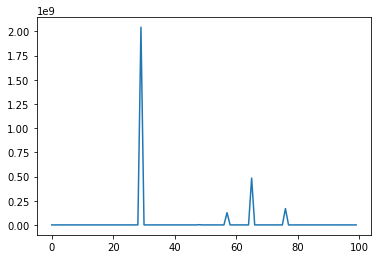

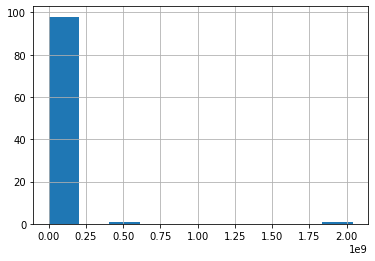

In [196]:
series = Series(model_paretto(N))
print(series.describe())
series.plot()
pyplot.show()

# histogram plot
series.hist()
pyplot.show()

Распределение Вейбулла

In [68]:
def cor_test(buf):
    
    bufer = buf.copy()
    key = []
    for i in range(0, len(bufer)):
        key.append(bin(i))
    key = ''.join(key)
    key = key.replace('b', '')
    #print(key)  
    sum_key = 0
    sum_key_1 = 0
    key_1= str(key[-1]+key[:(len(key)-1)])
    
    for i in range(len(key)):
        sum_key+=int(key[i])
    for i in range(len(key_1)):
        sum_key_1+=int(key_1[i])
    
    top_sum_1=0
    low_sum_1=0
    low_sum_2=0
    
    for i in range(len(key)):
        top_sum_1+=(int(key[i])*int(key_1[i]))
    for i in range(len(key)):
        low_sum_1+=(int(key[i])**2)
    for i in range(len(key)):
        low_sum_2+=(int(key_1[i])**2) 
        
    R= ((len(key)*top_sum_1) - (sum_key*sum_key_1))/pow(((len(key)*low_sum_1 - sum_key**2)*((len(key)*low_sum_2) - sum_key_1**2)), 0.5)
    R_mod =(1/(len(key)-1))+(2/(len(key)-2))*pow(((len(key))*((len(key))-3))/(len(key)+1) , 0.5)
    print(f'Коэффициент автокорреляции при k=1:{R}')
    print(f'Модульное значение (8):{R_mod}') 


def f(x):
    return (x*((c*x**(c-1))* np.exp(-x**c)))
v, err = integrate.quad(f, 0, np.inf)
print(v)

def veib_interval_dov(model, teor):

    bufer = model.copy()
    m = max(bufer)
    for i in range(0, len(bufer)):
        bufer[i] = bufer[i]/m
    
    middle = sum(model)/len(model)
    alpha = 0.05
    M_teor = v
    d_pr = M_teor - middle 
    d_cr = np.sqrt(np.var(bufer)/(len(bufer) * alpha))
    
    print(f"Практическое значение интервала {d_pr}")
    print(f"Критическое значение значение интервала {d_cr}")
    
    bufer_normal = np.random.normal(loc=0.0, scale=1.0, size=len(bufer))
    minik = min(bufer_normal)
    #print(minik)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i] + np.abs(minik))
                           
    maxik = max(bufer_normal)
    for i in range(0, len(bufer_normal)):
        bufer_normal[i] = (bufer_normal[i])/maxik
    
    middle_normal = sum(bufer_normal)/len(bufer_normal)
    
    x_2 = 3.84
    d_pr_normal = M_teor - middle_normal 
    d_cr_normal = np.sqrt(x_2 * np.var(bufer_normal)/(len(bufer_normal)))
    
    print(f"Практическое значение интервала для нормальных чисел {d_pr_normal}")
    print(f"Критическое значение значение интервала для нормальных чисел {d_cr_normal}")

def fric_test_veib(model, teor):#Частотный тест
    
    bufer = model.copy()
    m = max(bufer)
    for i in range(0, len(bufer)):
        bufer[i] = bufer[i]/m
    
    
    drob = 0.1
    #P_teor = len(buf)/10
    x_1 = x_2 = x_3 = x_4 = x_5 = x_6 = x_7 = x_8 = x_9 = x_10 = 0
    x = []
    for i in range(0, len(bufer)):
        if bufer[i] <= drob:
            x_1 += 1
        elif (bufer[i] > drob and bufer[i] <= (drob * 2)):
            x_2 += 1
        elif (bufer[i] > drob * 2 and bufer[i] <= (drob * 3)):
            x_3 += 1
        elif (bufer[i] > drob * 3 and bufer[i] <= (drob * 4)):
            x_4 += 1
        elif (bufer[i] > drob * 4 and bufer[i] <= (drob * 5)):
            x_5 += 1
        elif (bufer[i] > drob * 5 and bufer[i] <= (drob * 6)):
            x_6 += 1
        elif (bufer[i] > drob * 6 and bufer[i] <= (drob * 7)):
            x_7 += 1
        elif (bufer[i] > drob * 7 and bufer[i] <= (drob * 8)):
            x_8 += 1
        elif (bufer[i] > drob * 8 and bufer[i] <= (drob * 9)):
            x_9 += 1
        elif (bufer[i] > drob * 9 and bufer[i] <= (drob * 10)):
            x_10 += 1
    x.append(x_1)
    x.append(x_2)
    x.append(x_3)
    x.append(x_4)
    x.append(x_5)
    x.append(x_6)
    x.append(x_7)
    x.append(x_8)
    x.append(x_9)
    x.append(x_10)
     
    P_teor =0.1    
    x_1 = x_1/len(bufer)
    x_2 = x_2/len(bufer)
    x_3 = x_3/len(bufer)
    x_4 = x_4/len(bufer)
    x_5 = x_5/len(bufer)
    x_6 = x_6/len(bufer)
    x_7 = x_7/len(bufer)
    x_8 = x_8/len(bufer)
    x_9 = x_9/len(bufer)
    x_10 = x_10/len(bufer)
        
    X_2 = (((x_1 - P_teor) ** 2)/P_teor) + (((x_2 - P_teor) ** 2)/P_teor) + (((x_3 - P_teor) ** 2)/P_teor) + (((x_4 - P_teor) ** 2)/P_teor) + (((x_5 - P_teor) ** 2)/P_teor) + (((x_6 - P_teor) ** 2)/P_teor) + (((x_7 - P_teor) ** 2)/P_teor) + (((x_8 - P_teor) ** 2)/P_teor) + (((x_9 - P_teor) ** 2)/P_teor)  + (((x_10 - P_teor) ** 2)/P_teor)
        
    return X_2

In [82]:
def veibul(N):
    c = 1
    b = 1
    y = [(c*i**(c-1))*np.exp(-(i/b)**c) for i in range(1, N)]
    return y
c = 3
r = weibull_min.rvs(c, size=1000)

In [86]:
N = 10000
buf_veib = r
print(f'Значение Хи квадрат из частотного теста:{fric_test_veib(buf_veib, veibul(N))}')
cor_test(buf_veib)
veib_interval_dov(buf_veib, veibul(N))

Значение Хи квадрат из частотного теста:0.7659400000000001
Коэффициент автокорреляции при k=1:-0.10978607516444815
Модульное значение (8):0.020122266896857543
Практическое значение интервала -0.002987197935096053
Критическое значение значение интервала 0.022521514961740822
Практическое значение интервала для нормальных чисел 0.3382088172817139
Критическое значение значение интервала для нормальных чисел 0.00916496730494277


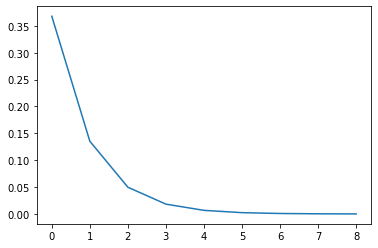

In [14]:
plt.plot(veibul(10))
plt.show()

count     9.000000e+00
mean      1.230738e-01
std       3.677141e-01
min      6.094372e-315
25%      1.600700e-147
50%       3.874815e-53
75%       5.074728e-11
max       1.103638e+00
dtype: float64


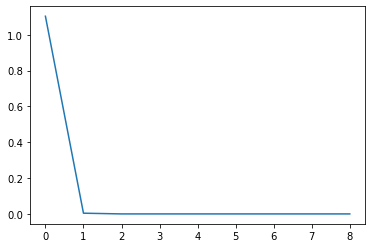

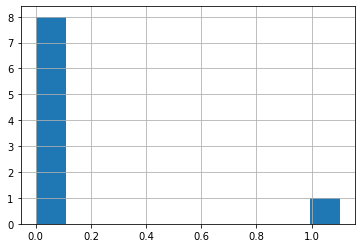

In [22]:
series = Series(veibul(10))
print(series.describe())
series.plot()
pyplot.show()

# histogram plot
series.hist()
pyplot.show()

In [75]:
c = 1
def f(x):
    return (x*((c*x**(c-1))* np.exp(-x**c)))
v, err = integrate.quad(f, 0, np.inf)
print(v)

0.9999999999999998


In [55]:
rv = weibull_min(c)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [56]:
vals = weibull_min.ppf([0.001, 0.5, 0.999], c)
np.allclose([0.001, 0.5, 0.999], weibull_min.cdf(vals, c))

True

In [57]:
r = weibull_min.rvs(c, size=1000)

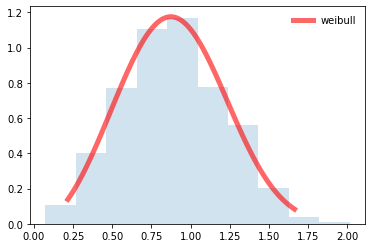

In [58]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(weibull_min.ppf(0.01, c),
                weibull_min.ppf(0.99, c), 100)
ax.plot(x, weibull_min.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='weibull')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)


plt.show()